In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter Plot
- Line plot과의 차이점
    1. size/color array 전달이 가능하다.
        - 3차원 or 4차원 정보를 전달할 수 있다.
        - 다만 요소가 많아지면 가시성이 떨어진다는 문제점이 있다.
        - 점들끼리의 비교가 핵심이다.
    2. 점들을 이어주는 라인에 대한 정보가 없기 때문에 속도가 빠르다.

<목차>
1. ax.plot, ax.scatter
2. size/color array

## 1) ax.scatter
- 매개변수 x, y에 대해 동일한 길이의 데이터를 전달해야 한다.
    - x, y는 optional argument가 아니다.

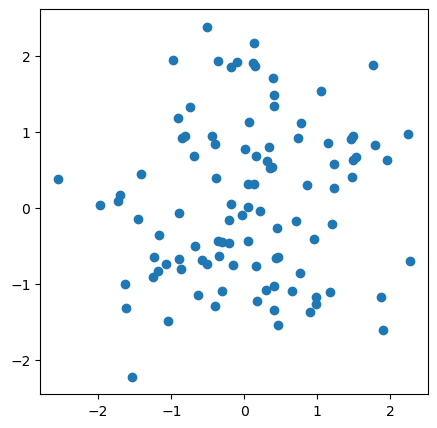

In [2]:
np.random.seed(0)

n_data = 100
x_data = np.random.normal(0, 1, (n_data, ))
y_data = np.random.normal(0, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(5, 5))

# ax.plot(x_data, y_data, 'o')
ax.scatter(x_data, y_data)

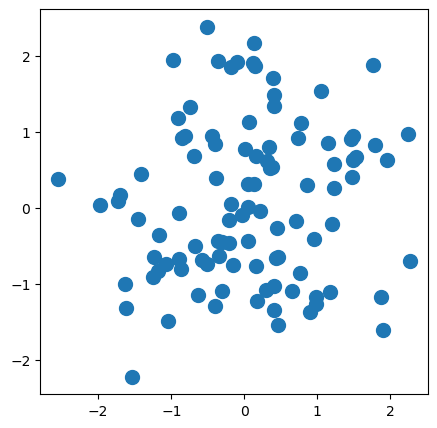

In [3]:
np.random.seed(0)

n_data = 100
x_data = np.random.normal(0, 1, (n_data, ))
y_data = np.random.normal(0, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(5, 5))

# ax.plot(x_data, y_data, 'o', markersize=10)
ax.scatter(x_data, y_data, s=100)

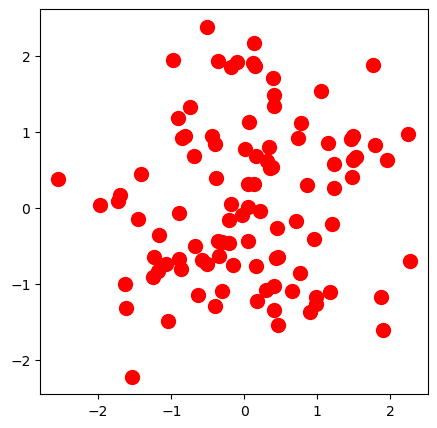

In [4]:
np.random.seed(0)

n_data = 100
x_data = np.random.normal(0, 1, (n_data, ))
y_data = np.random.normal(0, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(5, 5))

# ax.plot(x_data, y_data, 'o', color='r', markersize=10)
ax.scatter(x_data, y_data, s=100, color='r')

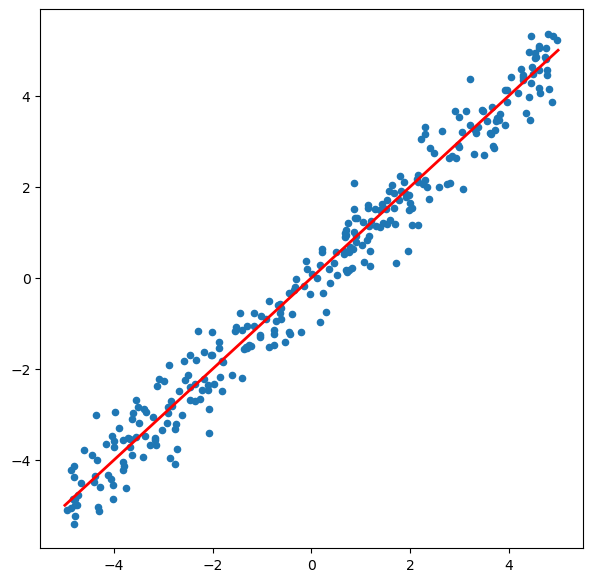

In [5]:
# line plot, scatter plot 가독성 비교
np.random.seed(0)

x_min, x_max = -5, 5
n_data = 300

x_data = np.random.uniform(x_min, x_max, n_data)
y_data = x_data + 0.5*np.random.normal(0, 1, n_data)

pred_x = np.linspace(x_min, x_max, 300)
pred_y = pred_x

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(x_data, y_data, s=20)

ax.plot(pred_x, pred_y,
        color='r',
        linewidth=2)

## 2) size/color array
- 3차원 혹은 4차원 정보를 한 그래프 안에 담을 수 있다.
- 하지만 데이터가 많아지면 가시성이 떨어지는 문제점이 있다.

### size array

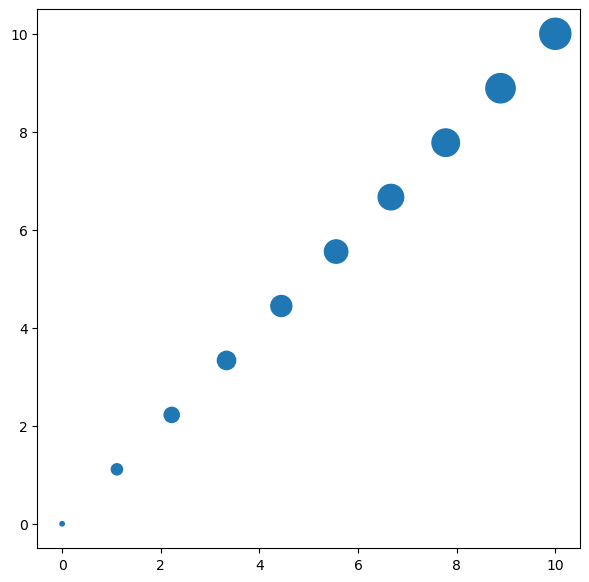

In [6]:
n_data = 10
x_data = np.linspace(0, 10, n_data)
y_data = np.linspace(0, 10, n_data)

arr_size = np.linspace(10, 500, n_data)

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x_data, y_data, s=arr_size)

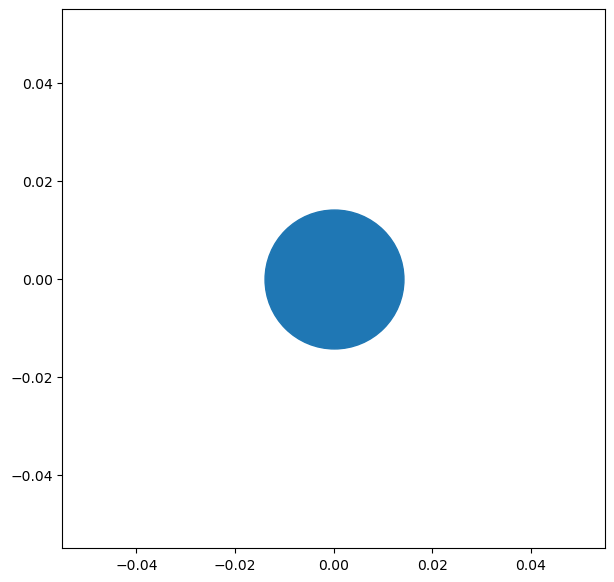

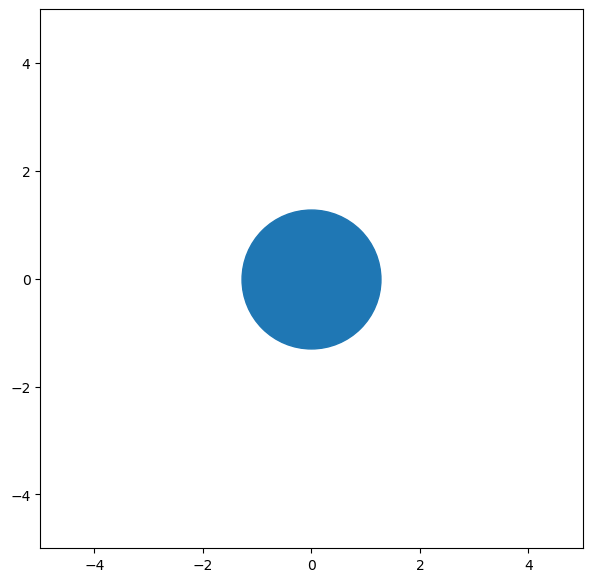

In [7]:
# s는 절대적인 크기를 의미한다.

# case1
fig, ax = plt.subplots(figsize=(7, 7))
# ax.plot(0, 0, 'o', markersize=100)
ax.scatter(0, 0, s=100**2)

# case2
fig2, ax2 = plt.subplots(figsize=(7, 7))
ax2.set_xlim([-5, 5])
ax2.set_ylim([-5, 5])
ax2.scatter(0, 0, s=100**2)

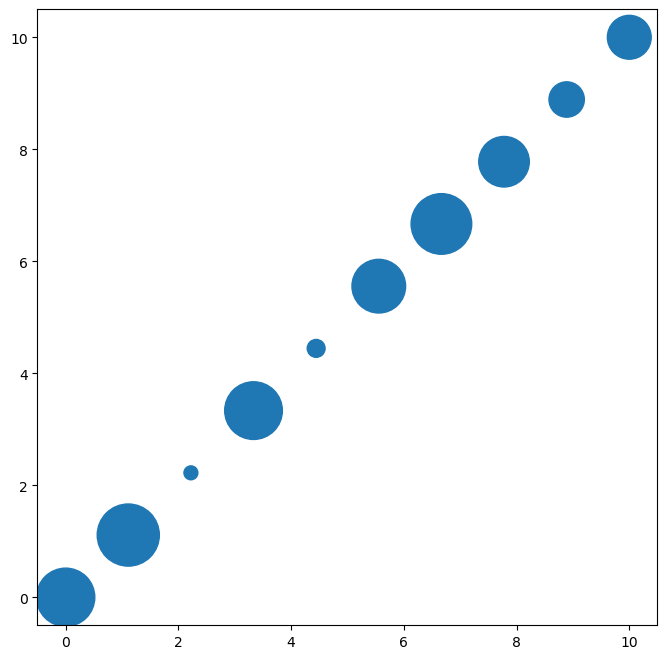

In [8]:
# 🔥 데이터 압축
def data2size(data, min_size, max_size):
    data_copy = data.copy()
    
    min_val = np.min(data_copy)
    data_copy -= min_val
    
    max_val = np.max(data_copy)
    data_copy /= max_val
    
    interval = max_size - min_size
    data_copy *= interval
    data_copy += min_size

    return data_copy

n_data = 10
x_data = np.linspace(0, 10, n_data)
y_data = np.linspace(0, 10, n_data)

z_data = np.random.normal(0, 1, n_data)
arr_size = data2size(z_data, 100, 2000)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_data, y_data, s=arr_size)

### color array
- cmap과 list comprehension을 이용해서 미리 color array를 생성한다.

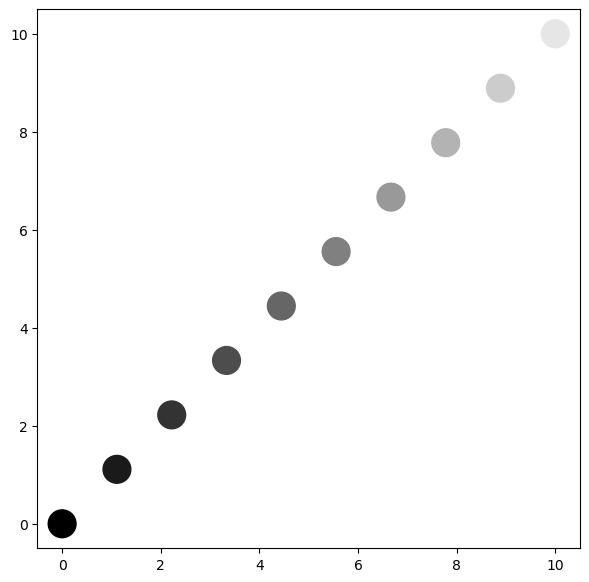

In [9]:
n_data = 10
x_data = np.linspace(0, 10, n_data)
y_data = np.linspace(0, 10, n_data)

arr_color = [(c/10, c/10, c/10) for c in range(n_data)]

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x_data, y_data, s=400, c=arr_color)

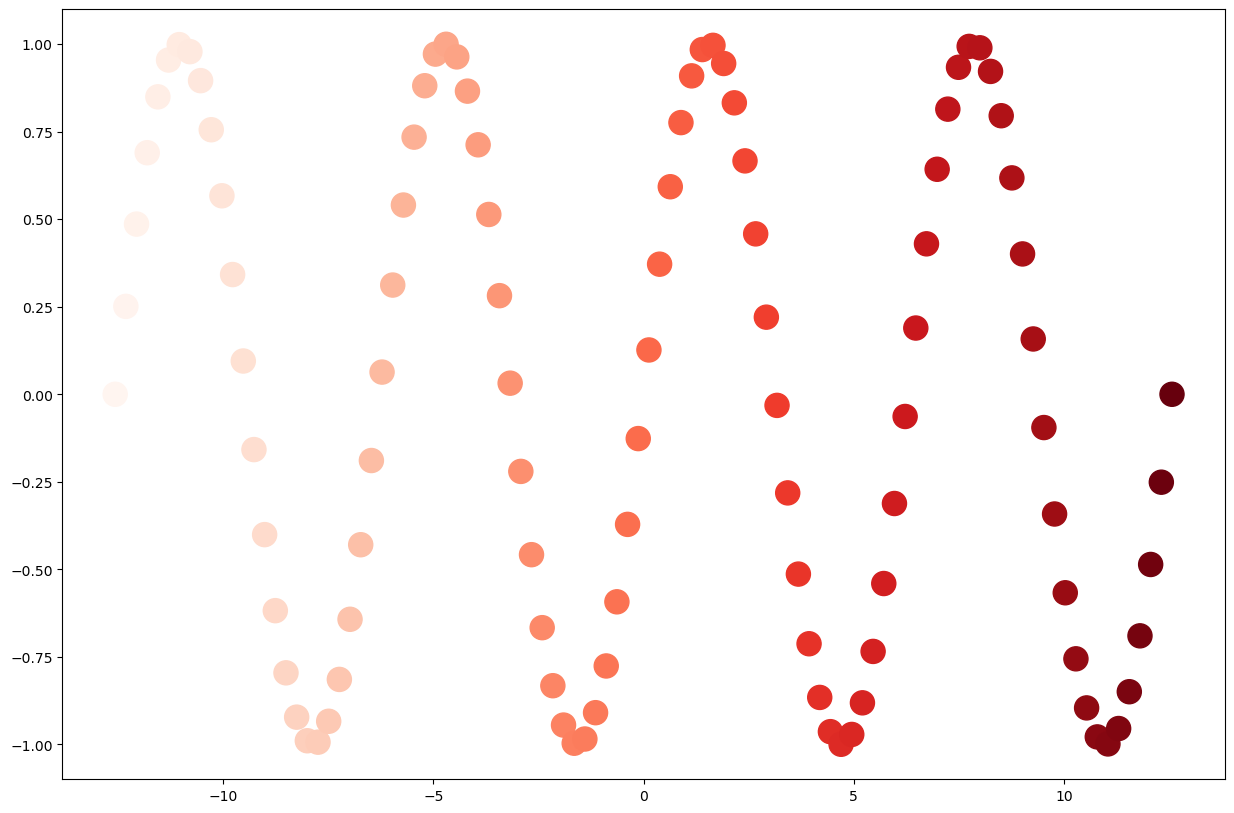

In [10]:
# cmap과 list comprehension을 이용해서 미리 color array를 생성한다.
PI = np.pi
n_point = 100
t = np.linspace(-4*PI, 4*PI, n_point)
sin = np.sin(t)

cmap = plt.get_cmap('Reds', lut=n_point)
arr_color = [cmap(idx) for idx in range(n_point)]

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(t, sin, s=300, c=arr_color)

### size array + color array
- 데이터가 겹치는 문제점이 있다.
    - 문제 해결을 위해 투명도(alpha)를 조절하면 된다.

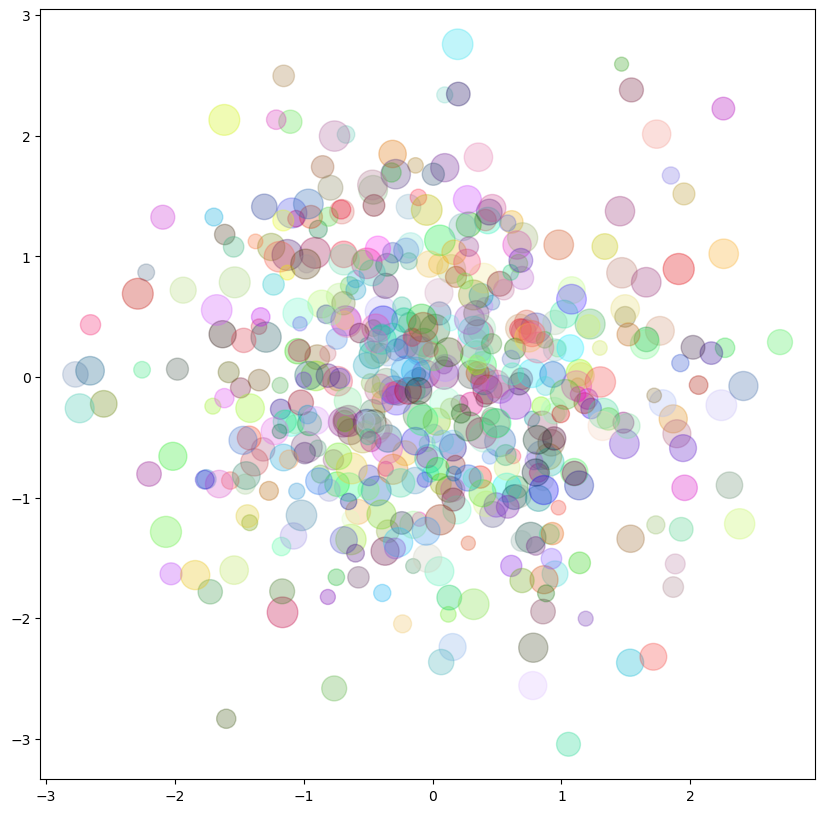

In [11]:
np.random.seed(0)

n_data = 500
x_data = np.random.normal(0, 1, size=(n_data, ))
y_data = np.random.normal(0, 1, size=(n_data, ))

arr_size = np.random.uniform(100, 500, n_data)
arr_color = [np.random.uniform(0, 1, 3) for _ in range(n_data)]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_data, y_data, s=arr_size, c=arr_color, alpha=.3)